In [1]:
import ROOT
import awkward as ak
import numpy as np

In [2]:
Events_WH = ak.from_parquet("AllDatasets_WH_combined.parquet")

In [3]:
Events_WH.fields

['nEvents',
 'pu_true',
 'nPhoton',
 'nPhoton_cut_10',
 'nPhoton_cut_18',
 'nPhoton_cut_30',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta

In [58]:
nEvents = Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"].nEvents

In [61]:
nEvents

<Array [[1.29e+05, 1.29e+05, ..., 1e+06, 1e+06]] type='1 * var * float64'>

In [60]:
len(nEvents[0])

1000000

In [64]:
for dataset in Events_WH.dataset:
    nEvents = Events_WH[Events_WH.dataset == dataset].nEvents
    pileup = Events_WH[Events_WH.dataset == dataset].pu_true
    n = len(nEvents[0])
    pileup = len(pileup[0])
    print(f"Dataset: {dataset}, Number of Events: {n}")
    print(f"Dataset: {dataset}, Number of pileup: {n}")

Dataset: M20_RunIISummer20UL16NanoAODAPVv9, Number of Events: 500000
Dataset: M20_RunIISummer20UL16NanoAODAPVv9, Number of pileup: 500000
Dataset: M20_RunIISummer20UL16NanoAODv9, Number of Events: 500000
Dataset: M20_RunIISummer20UL16NanoAODv9, Number of pileup: 500000
Dataset: M20_RunIISummer20UL17NanoAODv9, Number of Events: 1000000
Dataset: M20_RunIISummer20UL17NanoAODv9, Number of pileup: 1000000
Dataset: M20_RunIISummer20UL18NanoAODv9, Number of Events: 991000
Dataset: M20_RunIISummer20UL18NanoAODv9, Number of pileup: 991000
Dataset: M25_RunIISummer20UL16NanoAODAPVv9, Number of Events: 493000
Dataset: M25_RunIISummer20UL16NanoAODAPVv9, Number of pileup: 493000
Dataset: M25_RunIISummer20UL16NanoAODv9, Number of Events: 495305
Dataset: M25_RunIISummer20UL16NanoAODv9, Number of pileup: 495305
Dataset: M25_RunIISummer20UL17NanoAODv9, Number of Events: 1000000
Dataset: M25_RunIISummer20UL17NanoAODv9, Number of pileup: 1000000
Dataset: M25_RunIISummer20UL18NanoAODv9, Number of Events: 1

In [51]:
Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"].Genmatched_pho_1_pt[0]

<Array [86.5, 18.6, 54.3, 17.1, ..., 71.9, 13.7, 67] type='742337 * float64'>

In [52]:
Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"].Genmatched_pho_2_pt[0]

<Array [53.3, 34.7, 40.1, 33.2, ..., 118, 69.2, 14.9] type='741638 * float64'>

In [46]:
len(Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"])

1

In [43]:
Events_WH.dataset

<Array ['M20_RunIISummer20UL16NanoAODAPVv9', ...] type='36 * string'>

In [21]:
nEvents = Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"].pu_true[0]

In [13]:
Gen_photon_pT_lead = Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"]['lead_pt_pho_gen'][0]

In [27]:
Gen_photon_pT_lead_cut = Gen_photon_pT_lead[Gen_photon_pT_lead > 30.0]
Gen_photon_pT_sublead_cut = Gen_photon_pT_lead[Gen_photon_pT_lead > 18.0]

In [41]:
ak.any(np.isnan(Gen_photon_pT_lead_cut))

False

In [28]:
efficiency_lead = len(Gen_photon_pT_lead_cut)/len(nEvents)*100
efficiency_sublead = len(Gen_photon_pT_sublead_cut)/len(nEvents)*100

In [30]:
efficiency_lead, efficiency_sublead

(73.24581231079718, 91.32108980827446)

In [ ]:
nEvents = Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"].pu_true[0]
Gen_photon_pT_lead = Events_WH[Events_WH.dataset == "M50_RunIISummer20UL18NanoAODv9"]['lead_pt_pho_gen'][0]
Gen_photon_pT_lead_cut = Gen_photon_pT_lead[Gen_photon_pT_lead > 30.0]
Gen_photon_pT_sublead_cut = Gen_photon_pT_lead[Gen_photon_pT_lead > 18.0]
ak.any(np.isnan(Gen_photon_pT_lead_cut))
efficiency_lead = len(Gen_photon_pT_lead_cut)/len(nEvents)*100
efficiency_sublead = len(Gen_photon_pT_sublead_cut)/len(nEvents)*100
efficiency_lead, efficiency_sublead

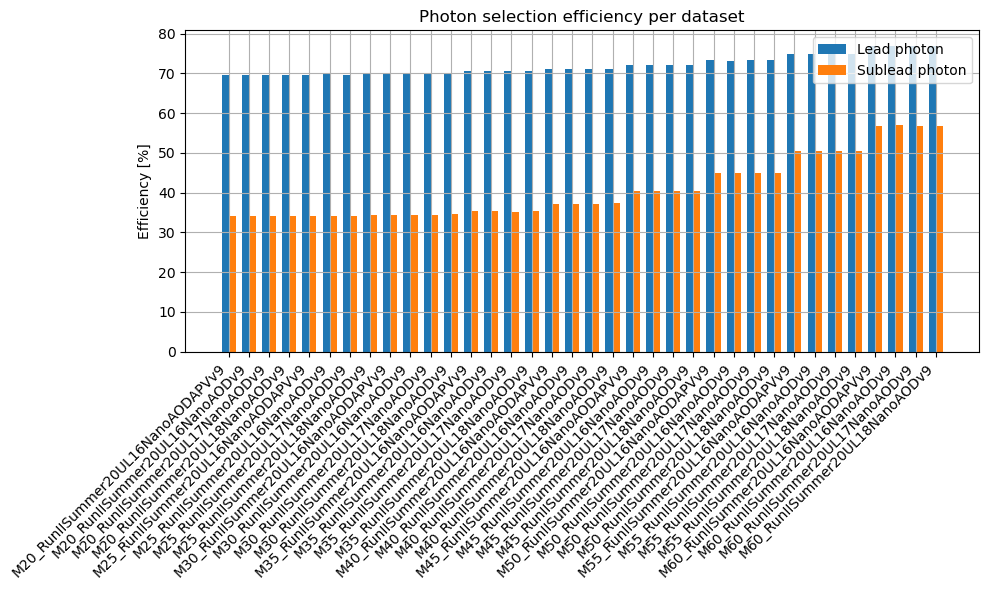

In [21]:
import awkward as ak
import numpy as np
import ROOT
import matplotlib.pyplot as plt

# Datasets you want to process
datasets = Events_WH.dataset

eff_lead = {}
eff_sublead = {}

# ROOT file to store all histograms
root_out = ROOT.TFile("GenPhotonPt_Distributions.root", "RECREATE")

for dset in datasets:
    # Select dataset
    ds_events = Events_WH[Events_WH.dataset == dset]

    nEvents = ds_events.pu_true[0]

    # Leading and subleading gen photon pT
    Gen_photon_pT_lead = ds_events["lead_pt_pho_gen"]
    Gen_photon_pT_sublead = ds_events["sublead_pt_pho_gen"]

    # Apply cuts
    Gen_photon_pT_lead_cut = Gen_photon_pT_lead[Gen_photon_pT_lead > 30.0]
    Gen_photon_pT_sublead_cut = Gen_photon_pT_sublead[Gen_photon_pT_sublead > 18.0]

    # Drop NaN and None
    Gen_photon_pT_lead_cut = Gen_photon_pT_lead_cut[
        ~ak.is_none(Gen_photon_pT_lead_cut) & ~np.isnan(ak.to_numpy(Gen_photon_pT_lead_cut))
    ]
    Gen_photon_pT_sublead_cut = Gen_photon_pT_sublead_cut[
        ~ak.is_none(Gen_photon_pT_sublead_cut) & ~np.isnan(ak.to_numpy(Gen_photon_pT_sublead_cut))
    ]

    # Efficiencies
    eff_lead[dset] = (len(Gen_photon_pT_lead_cut) / len(nEvents)) * 100.0
    eff_sublead[dset] = (len(Gen_photon_pT_sublead_cut) / len(nEvents)) * 100.0

    # --- Make histograms ---
    arr_lead = ak.to_numpy(Gen_photon_pT_lead_cut)
    arr_sublead = ak.to_numpy(Gen_photon_pT_sublead_cut)

    h_lead = ROOT.TH1F(f"h_lead_{dset}", f"Lead photon pT ({dset});pT [GeV];Events", 500, 0, max(arr_lead)*1.2 if len(arr_lead)>0 else 100)
    h_sublead = ROOT.TH1F(f"h_sublead_{dset}", f"Sublead photon pT ({dset});pT [GeV];Events", 500, 0, max(arr_sublead)*1.2 if len(arr_sublead)>0 else 100)

    for val in arr_lead:
        h_lead.Fill(val)
    for val in arr_sublead:
        h_sublead.Fill(val)

    # Write to ROOT file
    root_out.cd()
    h_lead.Write()
    h_sublead.Write()

root_out.Close()

# --- Plot efficiencies ---
labels = list(eff_lead.keys())
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, [eff_lead[l] for l in labels], width, label="Lead photon")
rects2 = ax.bar(x + width/2, [eff_sublead[l] for l in labels], width, label="Sublead photon")

ax.set_ylabel("Efficiency [%]")
ax.set_title("Photon selection efficiency per dataset")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
plt.grid()
ax.legend()
plt.tight_layout()
plt.show()


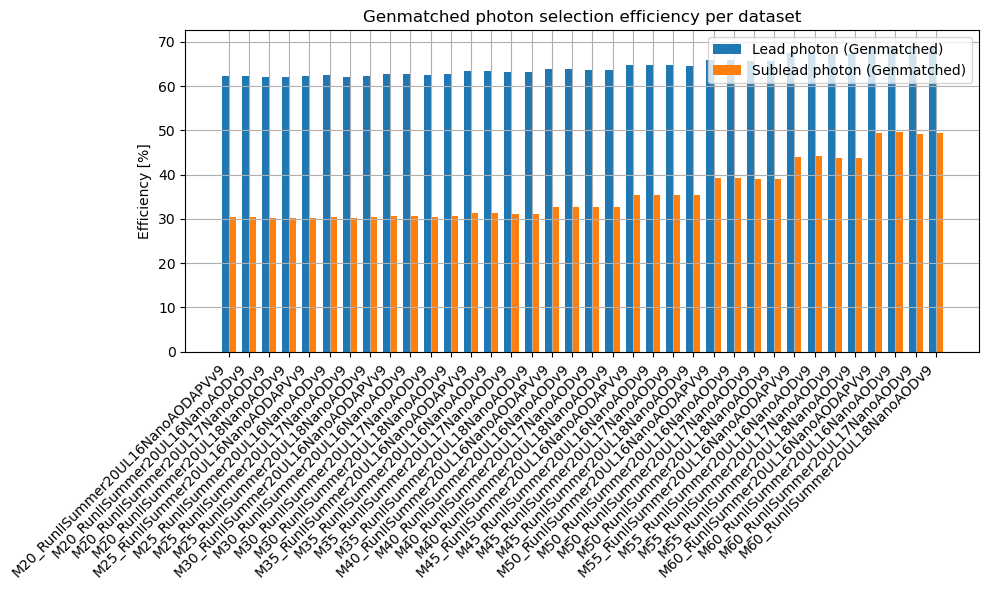

In [22]:
import awkward as ak
import numpy as np
import ROOT
import matplotlib.pyplot as plt

# Datasets you want to process
datasets = Events_WH.dataset

eff_lead = {}
eff_sublead = {}

# ROOT file to store all histograms
root_out = ROOT.TFile("GenmatchedPhotonPt_Distributions.root", "RECREATE")

for dset in np.unique(datasets):
    # Select dataset
    ds_events = Events_WH[Events_WH.dataset == dset]

    # Total number of events
    nEvents = len(ds_events.nEvents[0])

    # Genmatched photon pT
    Gen_photon_pT_lead = ds_events["Genmatched_pho_1_pt"]
    Gen_photon_pT_sublead = ds_events["Genmatched_pho_2_pt"]

    # Apply cuts
    Gen_photon_pT_lead_cut = Gen_photon_pT_lead[Gen_photon_pT_lead > 30.0]
    Gen_photon_pT_sublead_cut = Gen_photon_pT_sublead[Gen_photon_pT_sublead > 18.0]

    # Drop NaN / None
    Gen_photon_pT_lead_cut = Gen_photon_pT_lead_cut[
        ~ak.is_none(Gen_photon_pT_lead_cut) & ~np.isnan(ak.to_numpy(Gen_photon_pT_lead_cut))
    ]
    Gen_photon_pT_sublead_cut = Gen_photon_pT_sublead_cut[
        ~ak.is_none(Gen_photon_pT_sublead_cut) & ~np.isnan(ak.to_numpy(Gen_photon_pT_sublead_cut))
    ]

    # --- Efficiencies ---
    eff_lead[dset] = (len(Gen_photon_pT_lead_cut) / nEvents) * 100.0
    eff_sublead[dset] = (len(Gen_photon_pT_sublead_cut) / nEvents) * 100.0

    # --- Histograms ---
    arr_lead = ak.to_numpy(Gen_photon_pT_lead_cut)
    arr_sublead = ak.to_numpy(Gen_photon_pT_sublead_cut)

    h_lead = ROOT.TH1F(
        f"h_lead_{dset}",
        f"Genmatched lead photon pT ({dset});pT [GeV];Events",
        500,
        0,
        float(max(arr_lead)) * 1.2 if len(arr_lead) > 0 else 100,
    )
    h_sublead = ROOT.TH1F(
        f"h_sublead_{dset}",
        f"Genmatched sublead photon pT ({dset});pT [GeV];Events",
        500,
        0,
        float(max(arr_sublead)) * 1.2 if len(arr_sublead) > 0 else 100,
    )

    for val in arr_lead:
        h_lead.Fill(val)
    for val in arr_sublead:
        h_sublead.Fill(val)

    # Write to ROOT file
    root_out.cd()
    h_lead.Write()
    h_sublead.Write()

root_out.Close()

# --- Plot efficiencies ---
labels = list(eff_lead.keys())
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, [eff_lead[l] for l in labels], width, label="Lead photon (Genmatched)")
rects2 = ax.bar(x + width/2, [eff_sublead[l] for l in labels], width, label="Sublead photon (Genmatched)")

ax.set_ylabel("Efficiency [%]")
ax.set_title("Genmatched photon selection efficiency per dataset")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()




In [15]:
pho_pts[0]

<Array [{pt1: 50.3, pt2: nan}, ..., {...}] type='927817 * {pt1: float64, pt...'>

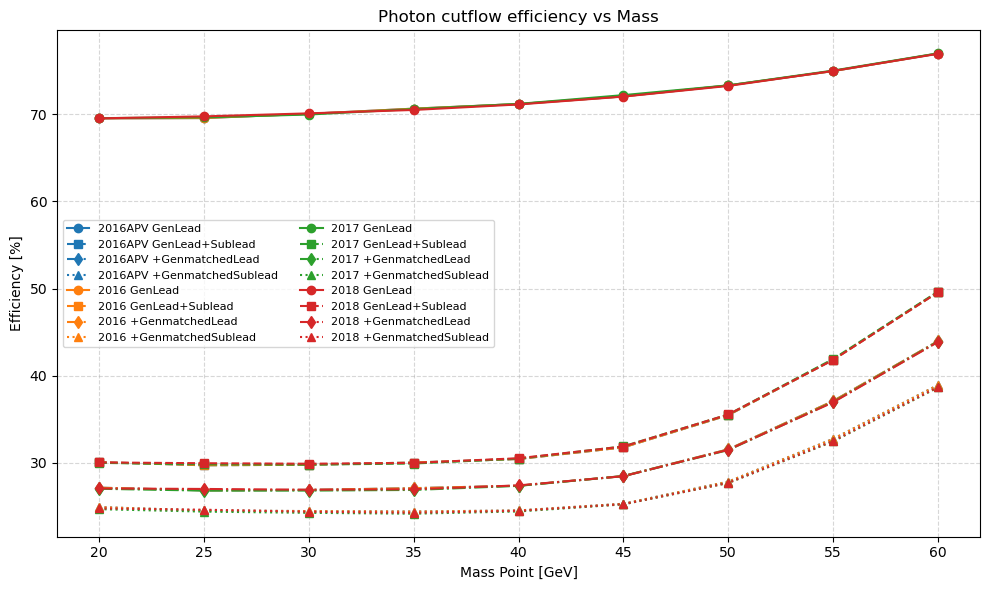

In [4]:
import uproot
import awkward as ak
import numpy as np
import ROOT
import matplotlib.pyplot as plt

# datasets = Events_WH.dataset

# # Store efficiencies for 4 stages
# eff_stages = {dset: {} for dset in datasets}

# root_out = ROOT.TFile("PhotonCutFlow_Distributions.root", "RECREATE")

# for dset in datasets:
#     ds_events = Events_WH[Events_WH.dataset == dset]

#     nEvents = len(ds_events.nEvents[0])

#     # --- Base variables ---
#     Gen_photon_pT_lead     = ds_events["lead_pt_pho_gen"]
#     Gen_photon_pT_sublead  = ds_events["sublead_pt_pho_gen"]
#     Genmatched_pho_1_pt    = ds_events["Genmatched_pho_1_pt"]
#     Genmatched_pho_2_pt    = ds_events["Genmatched_pho_2_pt"]

#     # --- Cut flow ---
#     # Stage 1: Gen lead cut
#     mask1 = (Gen_photon_pT_lead > 30.0)
#     eff_stages[dset]["GenLead"] = (ak.sum(mask1) / nEvents) * 100.0

#     # Stage 2: Gen lead + sublead
#     mask2 = mask1 & (Gen_photon_pT_sublead > 18.0)
#     eff_stages[dset]["GenLead+Sublead"] = (ak.sum(mask2) / nEvents) * 100.0

#     # Stage 3: + Genmatched lead
#     mask3 = mask2 & (Genmatched_pho_1_pt > 30.0)
#     eff_stages[dset]["+GenmatchedLead"] = (ak.sum(mask3) / nEvents) * 100.0

#     # Stage 4: + Genmatched sublead
#     mask4 = mask3 & (Genmatched_pho_2_pt > 18.0)
#     eff_stages[dset]["+GenmatchedSublead"] = (ak.sum(mask4) / nEvents) * 100.0

datasets = Events_WH.dataset

# Store efficiencies and surviving event counts
eff_stages   = {dset: {} for dset in datasets}
count_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("PhotonCutFlow_Distributions.root", "RECREATE")

for dset in datasets:
    ds_events = Events_WH[Events_WH.dataset == dset]

    nEvents = len(ds_events.nEvents[0])  # total events

    # --- Base variables ---
    Gen_photon_pT_lead     = ds_events["lead_pt_pho_gen"]
    Gen_photon_pT_sublead  = ds_events["sublead_pt_pho_gen"]
    Genmatched_pho_1_pt    = ds_events["Genmatched_pho_1_pt"]
    Genmatched_pho_2_pt    = ds_events["Genmatched_pho_2_pt"]

    # --- Cut flow ---
    # Stage 1: Gen lead cut
    mask1 = (Gen_photon_pT_lead > 30.0)
    count1 = ak.sum(mask1)
    eff_stages[dset]["GenLead"] = (count1 / nEvents) * 100.0
    count_stages[dset]["GenLead"] = int(count1)

    # Stage 2: Gen lead + sublead
    mask2 = mask1 & (Gen_photon_pT_sublead > 18.0)
    count2 = ak.sum(mask2)
    eff_stages[dset]["GenLead+Sublead"] = (count2 / nEvents) * 100.0
    count_stages[dset]["GenLead+Sublead"] = int(count2)

    # Stage 3: + Genmatched lead
    mask3 = mask2 & (Genmatched_pho_1_pt > 30.0)
    count3 = ak.sum(mask3)
    eff_stages[dset]["+GenmatchedLead"] = (count3 / nEvents) * 100.0
    count_stages[dset]["+GenmatchedLead"] = int(count3)

    # Stage 4: + Genmatched sublead
    mask4 = mask3 & (Genmatched_pho_2_pt > 18.0)
    count4 = ak.sum(mask4)
    eff_stages[dset]["+GenmatchedSublead"] = (count4 / nEvents) * 100.0
    count_stages[dset]["+GenmatchedSublead"] = int(count4)


    # --- Make histograms at each stage ---
    for i, (stage, mask) in enumerate(
        zip(["GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"],
            [mask1, mask2, mask3, mask4])
    ):
        arr_lead = np.asarray(ak.to_numpy(Gen_photon_pT_lead[mask]), dtype=float).flatten()
        arr_sublead = np.asarray(ak.to_numpy(Gen_photon_pT_sublead[mask]), dtype=float).flatten()

        if arr_lead.size > 0:
            xmax_lead = float(np.nanmax(arr_lead) * 1.2)
        else:
            xmax_lead = 100.0

        if arr_sublead.size > 0:
            xmax_sub = float(np.nanmax(arr_sublead) * 1.2)
        else:
            xmax_sub = 100.0

        h_lead = ROOT.TH1F(
            f"h_lead_{stage}_{dset}",
            f"Lead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_lead
        )
        h_sublead = ROOT.TH1F(
            f"h_sublead_{stage}_{dset}",
            f"Sublead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_sub
        )


        for val in arr_lead:    h_lead.Fill(val)
        for val in arr_sublead: h_sublead.Fill(val)

        root_out.cd()
        h_lead.Write()
        h_sublead.Write()

root_out.Close()

import re

years = ["2016APV", "2016", "2017", "2018"]
stages = ["GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"]

year_map = {
    "2016APV": "UL16NanoAODAPV",
    "2016":    "UL16NanoAOD",
    "2017":    "UL17NanoAOD",
    "2018":    "UL18NanoAOD",
}

colors = {"2016APV":"tab:blue", "2016":"tab:orange", "2017":"tab:green", "2018":"tab:red"}
linestyles = {
    "GenLead":"-",
    "GenLead+Sublead":"--",
    "+GenmatchedLead":"-.",
    "+GenmatchedSublead":":"
}

markers = {
    "GenLead":"o",
    "GenLead+Sublead":"s",
    "+GenmatchedLead":"d",
    "+GenmatchedSublead":"^"

}

# --- Extract all available mass points ---
all_masses = sorted(set(int(re.search(r"M(\d+)", d).group(1)) for d in datasets if "M" in d))

fig, ax = plt.subplots(figsize=(10,6))

for year in years:
    key = year_map[year]
    for stage in stages:
        vals = []
        for mass in all_masses:
            matching = [d for d in datasets if f"M{mass}" in d and key in d]
            if not matching:
                vals.append(np.nan)
                continue
            dset = matching[0]
            vals.append(eff_stages[dset][stage])
        
        ax.plot(all_masses, vals, 
                color=colors[year], 
                linestyle=linestyles[stage], 
                marker=markers[stage], 
                label=f"{year} {stage}")

ax.set_xlabel("Mass Point [GeV]")
ax.set_ylabel("Efficiency [%]")
ax.set_title("Photon cutflow efficiency vs Mass")
ax.grid(True, linestyle="--", alpha=0.5)

# Legend cleanup
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, ncol=2)

plt.tight_layout()
plt.show()


In [6]:
count_stages

{'M20_RunIISummer20UL16NanoAODAPVv9': {'GenLead': 347622,
  'GenLead+Sublead': 150471,
  '+GenmatchedLead': 135850,
  '+GenmatchedSublead': 124708},
 'M20_RunIISummer20UL16NanoAODv9': {'GenLead': 347930,
  'GenLead+Sublead': 150242,
  '+GenmatchedLead': 135598,
  '+GenmatchedSublead': 124230},
 'M20_RunIISummer20UL17NanoAODv9': {'GenLead': 695519,
  'GenLead+Sublead': 300186,
  '+GenmatchedLead': 270429,
  '+GenmatchedSublead': 247044},
 'M20_RunIISummer20UL18NanoAODv9': {'GenLead': 693154,
  'GenLead+Sublead': 299750,
  '+GenmatchedLead': 269990,
  '+GenmatchedSublead': 247118},
 'M25_RunIISummer20UL16NanoAODAPVv9': {'GenLead': 347111,
  'GenLead+Sublead': 148401,
  '+GenmatchedLead': 134056,
  '+GenmatchedSublead': 122525},
 'M25_RunIISummer20UL16NanoAODv9': {'GenLead': 349003,
  'GenLead+Sublead': 149251,
  '+GenmatchedLead': 134795,
  '+GenmatchedSublead': 123026},
 'M25_RunIISummer20UL17NanoAODv9': {'GenLead': 696360,
  'GenLead+Sublead': 298344,
  '+GenmatchedLead': 268352,
  '+G

In [9]:
import pandas as pd
import re

def parse_dataset_name(name):
    # Extract mass (e.g. M20, M25...)
    mass_match = re.match(r"^(M\d+)", name)
    mass = mass_match.group(1) if mass_match else "Unknown"

    # Extract year
    year_match = re.search(r"UL(\d+)(NanoAODAPVv9|NanoAODv9)", name)
    if year_match:
        year = "20" + year_match.group(1)  # 16 → 2016, etc.
        if "APV" in year_match.group(2):
            year += "APV"
    else:
        year = "Unknown"

    return mass, year

# Flatten dictionary
rows = []
for dset, stages in count_stages.items():
    mass, year = parse_dataset_name(dset)
    row = {"Mass": mass, "Year": year}
    row.update(stages)
    rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)

# Order columns
df = df[["Mass", "Year", "GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"]]

# Sort (M20 < M25 < ... and Year ordered naturally)
df["Mass_num"] = df["Mass"].str.extract(r"M(\d+)").astype(int)
df["Year_sort"] = df["Year"].replace({"2016APV": 2015.5}).replace("Unknown", 9999)  # APV before 2016
df = df.sort_values(by=["Mass_num", "Year_sort"]).reset_index(drop=True)
df = df.drop(columns=["Mass_num", "Year_sort"])

# Print table (nice for paper)
print(df.to_string(index=False))

# Save for later
df.to_csv("photon_cutflow_table.csv", index=False)
df.to_excel("photon_cutflow_table.xlsx", index=False)


Mass    Year  GenLead  GenLead+Sublead  +GenmatchedLead  +GenmatchedSublead
 M20 2016APV   347622           150471           135850              124708
 M20    2016   347930           150242           135598              124230
 M20    2017   695519           300186           270429              247044
 M20    2018   693154           299750           269990              247118
 M25 2016APV   347111           148401           134056              122525
 M25    2016   349003           149251           134795              123026
 M25    2017   696360           298344           268352              244243
 M25    2018   697524           299723           270227              246442
 M30 2016APV   348827           148404           134025              121940
 M30    2016   333745           142022           127937              116296
 M30    2017   697564           297242           267547              242098
 M30    2018   700979           299149           269354              244041
 M35 2016APV

In [11]:
import pandas as pd
import re

def parse_dataset_name(name):
    # Extract mass (e.g. M20, M25...)
    mass_match = re.match(r"^(M\d+)", name)
    mass = mass_match.group(1) if mass_match else "Unknown"

    # Extract year
    year_match = re.search(r"UL(\d+)(NanoAODAPVv9|NanoAODv9)", name)
    if year_match:
        year = "20" + year_match.group(1)  # 16 → 2016, etc.
        if "APV" in year_match.group(2):
            year += "APV"
    else:
        year = "Unknown"

    return mass, year

# Flatten dictionary
rows = []
for dset, stages in count_stages.items():
    mass, year = parse_dataset_name(dset)
    row = {"Year": year, "Mass": mass}
    row.update(stages)
    rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)

# Order columns
df = df[["Year", "Mass", "GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"]]

# Sort naturally
df["Mass_num"] = df["Mass"].str.extract(r"M(\d+)").astype(int)
df["Year_sort"] = df["Year"].replace({"2016APV": 2015.5}).replace("Unknown", 9999)
df = df.sort_values(by=["Year_sort", "Mass_num"]).reset_index(drop=True)
df = df.drop(columns=["Mass_num", "Year_sort"])

# ---- Create grouped table for Excel ----
excel_rows = []
for year, block in df.groupby("Year"):
    # Insert header row for year
    excel_rows.append([f"Year: {year}", "", "", "", "", ""])
    # Add block rows
    excel_rows.extend(block.drop(columns=["Year"]).values.tolist())
    # Blank line after each year (optional)
    excel_rows.append([""] * 6)

# Convert back to DataFrame for export
df_excel = pd.DataFrame(
    excel_rows,
    columns=["Year/Mass", "GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead", ""]
)

# Save to Excel
df_excel.to_excel("photon_cutflow_table.xlsx", index=False, header=True)

print("Saved photon_cutflow_table.xlsx with grouped year blocks.")


Saved photon_cutflow_table.xlsx with grouped year blocks.


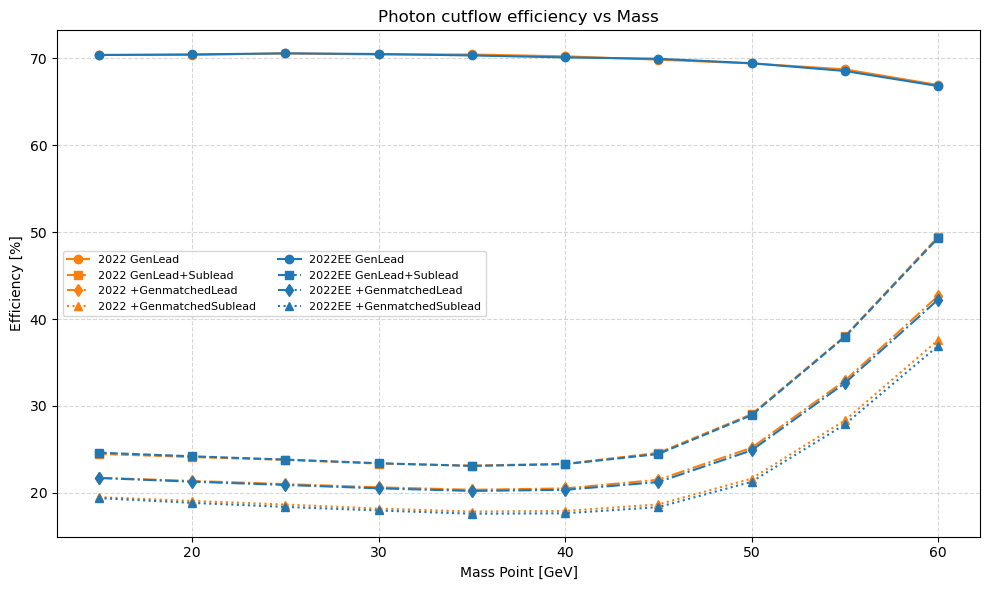

In [1]:
import uproot
import awkward as ak
import numpy as np
import ROOT
import matplotlib.pyplot as plt

Events_ggH = ak.from_parquet("AllDatasets_ggH.parquet")

datasets = Events_ggH.dataset

# Store efficiencies for 4 stages
eff_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("PhotonCutFlow_Distributions.root", "UPDATE")

for dset in datasets:
    ds_events = Events_ggH[Events_ggH.dataset == dset]

    nEvents = len(ds_events.nEvents[0])

    # --- Base variables ---
    Gen_photon_pT_lead     = ds_events["lead_pt_pho_gen"]
    Gen_photon_pT_sublead  = ds_events["sublead_pt_pho_gen"]
    Genmatched_pho_1_pt    = ds_events["Genmatched_pho_1_pt"]
    Genmatched_pho_2_pt    = ds_events["Genmatched_pho_2_pt"]

    # --- Cut flow ---
    # Stage 1: Gen lead cut
    mask1 = (Gen_photon_pT_lead > 30.0)
    eff_stages[dset]["GenLead"] = (ak.sum(mask1) / nEvents) * 100.0

    # Stage 2: Gen lead + sublead
    mask2 = mask1 & (Gen_photon_pT_sublead > 18.0)
    eff_stages[dset]["GenLead+Sublead"] = (ak.sum(mask2) / nEvents) * 100.0

    # Stage 3: + Genmatched lead
    mask3 = mask2 & (Genmatched_pho_1_pt > 30.0)
    eff_stages[dset]["+GenmatchedLead"] = (ak.sum(mask3) / nEvents) * 100.0

    # Stage 4: + Genmatched sublead
    mask4 = mask3 & (Genmatched_pho_2_pt > 18.0)
    eff_stages[dset]["+GenmatchedSublead"] = (ak.sum(mask4) / nEvents) * 100.0

    # --- Make histograms at each stage ---
    for i, (stage, mask) in enumerate(
        zip(["GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"],
            [mask1, mask2, mask3, mask4])
    ):
        arr_lead = np.asarray(ak.to_numpy(Gen_photon_pT_lead[mask]), dtype=float).flatten()
        arr_sublead = np.asarray(ak.to_numpy(Gen_photon_pT_sublead[mask]), dtype=float).flatten()

        if arr_lead.size > 0:
            xmax_lead = float(np.nanmax(arr_lead) * 1.2)
        else:
            xmax_lead = 100.0

        if arr_sublead.size > 0:
            xmax_sub = float(np.nanmax(arr_sublead) * 1.2)
        else:
            xmax_sub = 100.0

        h_lead = ROOT.TH1F(
            f"h_lead_{stage}_{dset}",
            f"Lead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_lead
        )
        h_sublead = ROOT.TH1F(
            f"h_sublead_{stage}_{dset}",
            f"Sublead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_sub
        )


        for val in arr_lead:    h_lead.Fill(val)
        for val in arr_sublead: h_sublead.Fill(val)

        root_out.cd()
        h_lead.Write()
        h_sublead.Write()

root_out.Close()

# mass_points = [20, 35, 50, 60]
# years = ["2016APV", "2016", "2017", "2018"]
# stages = ["GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"]

# year_map = {
#     "2016APV": "UL16NanoAODAPV",
#     "2016":    "UL16NanoAOD",
#     "2017":    "UL17NanoAOD",
#     "2018":    "UL18NanoAOD",
# }

# for year, key in year_map.items():
#     fig, ax = plt.subplots(figsize=(12,6))

#     x = np.arange(len(mass_points))
#     width = 0.18

#     for j, stage in enumerate(stages):
#         vals = []
#         labels = []
#         for mass in mass_points:
#             matching = [d for d in datasets if f"M{mass}" in d and key in d]
#             if not matching:
#                 vals.append(0)
#                 continue
#             dset = matching[0]
#             vals.append(eff_stages[dset][stage])
#             labels.append(f"M{mass}")

#         ax.bar(x + j*width, vals, width, label=stage)

#     ax.set_ylabel("Efficiency [%]")
#     ax.set_title(f"Photon cutflow efficiency ({year})")
#     ax.set_xticks(x + width*(len(stages)-1)/2)
#     ax.set_xticklabels([f"M{m}" for m in mass_points])
#     ax.legend(fontsize=8)  # cuts in legend
#     ax.grid(True, linestyle="--", alpha=0.6)
#     plt.tight_layout()
#     plt.show()

import re

years = ["2022", "2022EE"]
stages = ["GenLead", "GenLead+Sublead", "+GenmatchedLead", "+GenmatchedSublead"]

year_map = {
    "2022EE": "22EENanoAODv13",
    "2022":    "22NanoAODv13",
}

colors = {"2022EE":"tab:blue", "2022":"tab:orange"}
linestyles = {
    "GenLead":"-",
    "GenLead+Sublead":"--",
    "+GenmatchedLead":"-.",
    "+GenmatchedSublead":":"
}

markers = {
    "GenLead":"o",
    "GenLead+Sublead":"s",
    "+GenmatchedLead":"d",
    "+GenmatchedSublead":"^"

}

# --- Extract all available mass points ---
all_masses = sorted(set(int(re.search(r"M(\d+)", d).group(1)) for d in datasets if "M" in d))

fig, ax = plt.subplots(figsize=(10,6))

for year in years:
    key = year_map[year]
    for stage in stages:
        vals = []
        for mass in all_masses:
            matching = [d for d in datasets if f"M{mass}" in d and key in d]
            if not matching:
                vals.append(np.nan)
                continue
            dset = matching[0]
            vals.append(eff_stages[dset][stage])
        
        ax.plot(all_masses, vals, 
                color=colors[year], 
                linestyle=linestyles[stage], 
                marker=markers[stage], 
                label=f"{year} {stage}")

ax.set_xlabel("Mass Point [GeV]")
ax.set_ylabel("Efficiency [%]")
ax.set_title("Photon cutflow efficiency vs Mass")
ax.grid(True, linestyle="--", alpha=0.5)

# Legend cleanup
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

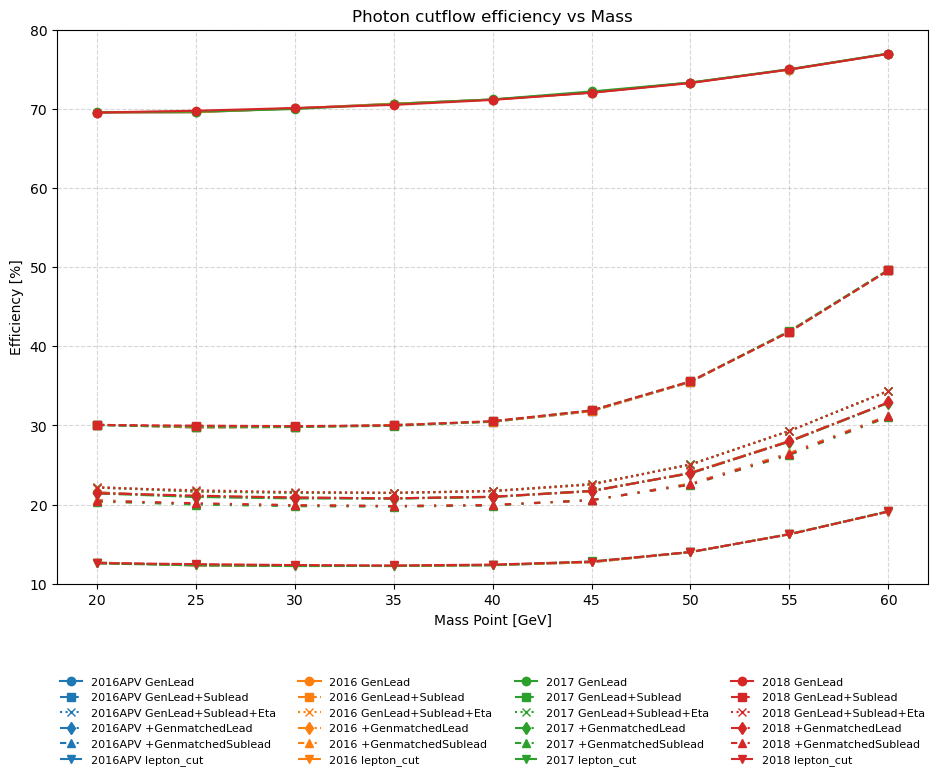

In [12]:
import uproot
import awkward as ak
import numpy as np
import ROOT
import matplotlib.pyplot as plt

# # --- pT thresholds by year ---
# pt_thresholds = {
#     "UL16NanoAODAPV": {"ele": 27.0, "mu": 24.0, "tau": 27.0},
#     "UL16NanoAOD":    {"ele": 27.0, "mu": 24.0, "tau": 27.0},
#     "UL17NanoAOD":    {"ele": 32.0, "mu": 27.0, "tau": 27.0},
#     "UL18NanoAOD":    {"ele": 32.0, "mu": 24.0, "tau": 27.0},
# }

datasets = Events_WH.dataset

# Store efficiencies for 4 stages
eff_stages   = {dset: {} for dset in datasets}
count_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("PhotonCutFlow_Distributions.root", "RECREATE")

for dset in datasets:
    ds_events = Events_WH[Events_WH.dataset == dset]

    nEvents = len(ds_events.nEvents[0])
    count_stages[dset]["nEvents"] = int(nEvents)

    # --- Base variables ---
    Gen_photon_pT_lead     = ds_events["lead_pt_pho_gen"]
    Gen_photon_pT_sublead  = ds_events["sublead_pt_pho_gen"]
    Gen_photon_eta_lead     = ds_events["lead_eta_pho_gen"]
    Gen_photon_eta_sublead  = ds_events["sublead_eta_pho_gen"]
    Genmatched_pho_1_pt    = ds_events["Genmatched_pho_1_pt"]
    Genmatched_pho_2_pt    = ds_events["Genmatched_pho_2_pt"]
    # --- RECO matched Leptons---
    reco_ele_pt     = ds_events["matched_reco_ele_pt"]
    reco_ele_eta    = ds_events["matched_reco_ele_eta"]
    reco_mu_pt      = ds_events["matched_reco_mu_pt"]
    reco_mu_eta     = ds_events["matched_reco_mu_eta"]
    reco_tau_ele_pt     = ds_events["matched_reco_ele_tau_pt"]
    reco_tau_ele_eta    = ds_events["matched_reco_ele_tau_eta"]
    reco_tau_mu_pt     = ds_events["matched_reco_mu_tau_pt"]
    reco_tau_mu_eta    = ds_events["matched_reco_mu_tau_eta"]

    #     # --- Determine thresholds by dataset year ---
    # pt_cfg = None
    # for key, cfg in pt_thresholds.items():
    #     if key in dset:
    #         pt_cfg = cfg
    #         break
    # if pt_cfg is None:
    #     raise RuntimeError(f"Could not determine year threshold for dataset {dset}")

    # pt_ele = pt_cfg["ele"]
    # pt_mu  = pt_cfg["mu"]
    # pt_tau = pt_cfg["tau"]

    # --- Cut flow ---
    # Stage 1: Gen lead cut
    mask1 = (Gen_photon_pT_lead > 30.0)
    count1 = ak.sum(mask1)
    eff_stages[dset]["GenLead"] = (ak.sum(mask1) / nEvents) * 100.0
    count_stages[dset]["GenLead"] = int(count1)

    # Stage 2: Gen lead + sublead
    mask2 = mask1 & (Gen_photon_pT_sublead > 18.0)
    count2 = ak.sum(mask2)
    eff_stages[dset]["GenLead+Sublead"] = (ak.sum(mask2) / nEvents) * 100.0
    count_stages[dset]["GenLead+Sublead"] = int(count2)

    # Stage 3: + Eta
    mask3 = (
    mask2
    & ((abs(Gen_photon_eta_lead) < 1.4442) | ((abs(Gen_photon_eta_lead) > 1.57) & (abs(Gen_photon_eta_lead) < 2.4)))
    & ((abs(Gen_photon_eta_sublead) < 1.4442) | ((abs(Gen_photon_eta_sublead) > 1.57) & (abs(Gen_photon_eta_sublead) < 2.4)))
)
    count3 = ak.sum(mask3)

    eff_stages[dset]["GenLead+Sublead+Eta"] = (ak.sum(mask3) / nEvents) * 100.0
    count_stages[dset]["GenLead+Sublead+Eta"] = int(count3)
    # Stage 3: + Genmatched lead
    mask4 = mask3 & (Genmatched_pho_1_pt > 30.0)
    count4 = ak.sum(mask4)
    eff_stages[dset]["+GenmatchedLead"] = (ak.sum(mask4) / nEvents) * 100.0
    count_stages[dset]["+GenmatchedLead"] = int(count4)

    # Stage 4: + Genmatched sublead
    mask5 = mask4 & (Genmatched_pho_2_pt > 18.0)
    count5 = ak.sum(mask5)
    eff_stages[dset]["+GenmatchedSublead"] = (ak.sum(mask5) / nEvents) * 100.0
    count_stages[dset]["+GenmatchedSublead"] = int(count5)

        # ---------------- Matched Reco Lepton ----------------
    mask_ele_reco = mask5 & (reco_ele_pt > 10.0)
    mask_mu_reco  =  mask5 & (reco_mu_pt  > 10.0)
    mask_tau_ele_reco = mask5 & (reco_tau_ele_pt > 10.0)
    mask_tau_mu_reco = mask5 & (reco_tau_mu_pt > 10.0)

    # mask_ele_reco = mask5 & (reco_ele_pt > pt_ele)
    # mask_mu_reco  =  mask5 & (reco_mu_pt  > pt_mu)
    # mask_tau_ele_reco = mask5 & (reco_tau_ele_pt > pt_tau)
    # mask_tau_mu_reco = mask5 & (reco_tau_mu_pt > pt_tau)

    mask_any_reco_lep = mask_ele_reco | mask_mu_reco | mask_tau_ele_reco | mask_tau_mu_reco
    count6 = ak.sum(mask_any_reco_lep)
    eff_stages[dset]["lepton_cut"] = (np.sum(mask_any_reco_lep) / nEvents) * 100.0
    count_stages[dset]["lepton_cut"] = int(count6)

    # --- Make histograms at each stage ---
    for i, (stage, mask) in enumerate(
        zip(["GenLead", "GenLead+Sublead", "GenLead+Sublead+Eta",  "+GenmatchedLead", "+GenmatchedSublead", "lepton_cut"],
            [mask1, mask2, mask3, mask4, mask5])
    ):
        arr_lead = np.asarray(ak.to_numpy(Gen_photon_pT_lead[mask]), dtype=float).flatten()
        arr_sublead = np.asarray(ak.to_numpy(Gen_photon_pT_sublead[mask]), dtype=float).flatten()

        if arr_lead.size > 0:
            xmax_lead = float(np.nanmax(arr_lead) * 1.2)
        else:
            xmax_lead = 100.0

        if arr_sublead.size > 0:
            xmax_sub = float(np.nanmax(arr_sublead) * 1.2)
        else:
            xmax_sub = 100.0

        h_lead = ROOT.TH1F(
            f"h_lead_{stage}_{dset}",
            f"Lead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_lead
        )
        h_sublead = ROOT.TH1F(
            f"h_sublead_{stage}_{dset}",
            f"Sublead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_sub
        )


        for val in arr_lead:    h_lead.Fill(val)
        for val in arr_sublead: h_sublead.Fill(val)

        root_out.cd()
        h_lead.Write()
        h_sublead.Write()

root_out.Close()

import re

years = ["2016APV", "2016", "2017", "2018"]
stages = ["GenLead", "GenLead+Sublead", "GenLead+Sublead+Eta", "+GenmatchedLead", "+GenmatchedSublead", "lepton_cut"]

year_map = {
    "2016APV": "UL16NanoAODAPV",
    "2016":    "UL16NanoAOD",
    "2017":    "UL17NanoAOD",
    "2018":    "UL18NanoAOD",
}

colors = {"2016APV":"tab:blue", "2016":"tab:orange", "2017":"tab:green", "2018":"tab:red"}
# linestyles = {
#     "GenLead":"-",
#     "GenLead+Sublead":"--",
#     "GenLead+Sublead+Eta":":",
#     "+GenmatchedLead":"-.",
#     "+GenmatchedSublead":":",
#     "lepton_cut":"",
# }
linestyles = {
    "GenLead": "-",
    "GenLead+Sublead": "--",
    "GenLead+Sublead+Eta": ":",
    "+GenmatchedLead": "-.",
    "+GenmatchedSublead": (0, (3, 5, 1, 5)),  # dash-dot-dash
    "lepton_cut": (0, (5, 1)),  # densely dashed
}

markers = {
    "GenLead": "o",              # circle
    "GenLead+Sublead": "s",      # square
    "GenLead+Sublead+Eta": "x",  # cross
    "+GenmatchedLead": "d",      # diamond
    "+GenmatchedSublead": "^",   # triangle up
    "lepton_cut": "v",           # triangle down
}


# --- Extract all available mass points ---
all_masses = sorted(set(int(re.search(r"M(\d+)", d).group(1)) for d in datasets if "M" in d))

fig, ax = plt.subplots(figsize=(10,8))

for year in years:
    key = year_map[year]
    for stage in stages:
        vals = []
        for mass in all_masses:
            matching = [d for d in datasets if f"M{mass}" in d and key in d]
            if not matching:
                vals.append(np.nan)
                continue
            dset = matching[0]
            vals.append(eff_stages[dset][stage])
        
        ax.plot(all_masses, vals, 
                color=colors[year], 
                linestyle=linestyles[stage], 
                marker=markers[stage], 
                label=f"{year} {stage}")

ax.set_xlabel("Mass Point [GeV]")
ax.set_ylabel("Efficiency [%]")
ax.set_title("Photon cutflow efficiency vs Mass")
ax.grid(True, linestyle="--", alpha=0.5)

# Legend cleanup
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(), fontsize=8, ncol=2)
ax.legend(by_label.values(),
          by_label.keys(),
          loc='upper center',       # anchor legend at the top
          bbox_to_anchor=(0.5, -0.15),  # shift it below the plot
          fontsize=8,
          ncol=4,                   # increase columns for compactness
          frameon=False)            # optional: remove legend box

plt.tight_layout()
plt.ylim(10,80)
plt.show()

In [18]:
import cutflow_table as ct

ct.make_cutflow_table(count_stages, "WH_cutflow_table_diphoton_trigger.xlsx")


Saved WH_cutflow_table_diphoton_trigger.xlsx with preserved column order and efficiency column.


In [16]:
count_stages

{'M20_RunIISummer20UL16NanoAODAPVv9': {'GenLead': 347622,
  'GenLead+Sublead': 150471,
  'GenLead+Sublead+Eta': 111172,
  '+GenmatchedLead': 107702,
  '+GenmatchedSublead': 102826,
  'lepton_cut': 63402},
 'M20_RunIISummer20UL16NanoAODv9': {'GenLead': 347930,
  'GenLead+Sublead': 150242,
  'GenLead+Sublead+Eta': 110676,
  '+GenmatchedLead': 107196,
  '+GenmatchedSublead': 102196,
  'lepton_cut': 62794},
 'M20_RunIISummer20UL17NanoAODv9': {'GenLead': 695519,
  'GenLead+Sublead': 300186,
  'GenLead+Sublead+Eta': 221264,
  '+GenmatchedLead': 214043,
  '+GenmatchedSublead': 203777,
  'lepton_cut': 125582},
 'M20_RunIISummer20UL18NanoAODv9': {'GenLead': 693154,
  'GenLead+Sublead': 299750,
  'GenLead+Sublead+Eta': 220744,
  '+GenmatchedLead': 213703,
  '+GenmatchedSublead': 203663,
  'lepton_cut': 125708},
 'M25_RunIISummer20UL16NanoAODAPVv9': {'GenLead': 347111,
  'GenLead+Sublead': 148401,
  'GenLead+Sublead+Eta': 107957,
  '+GenmatchedLead': 104739,
  '+GenmatchedSublead': 100093,
  'lep

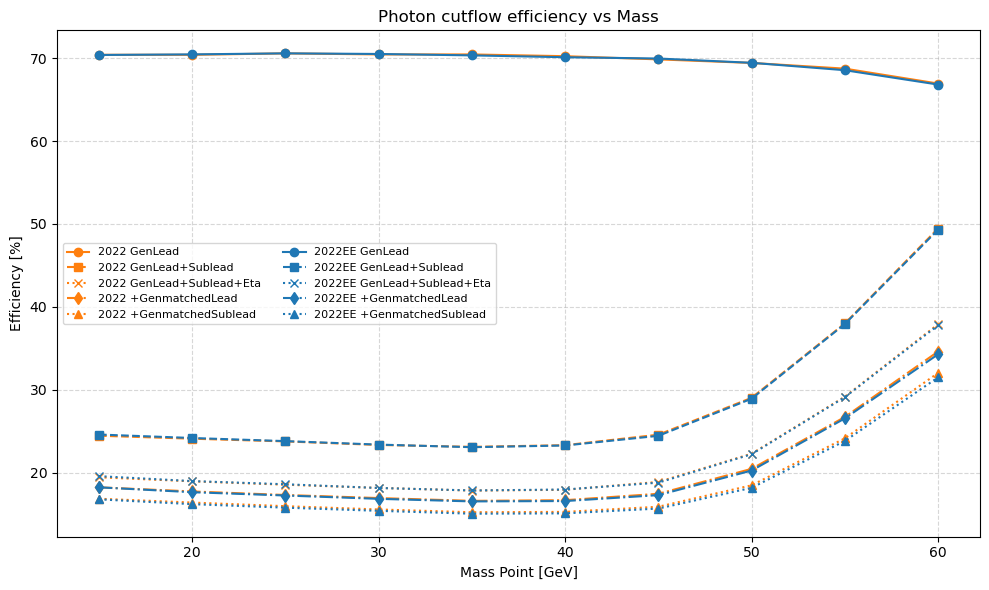

In [7]:
import uproot
import awkward as ak
import numpy as np
import ROOT
import matplotlib.pyplot as plt

Events_ggH = ak.from_parquet("AllDatasets_ggH.parquet")
datasets = Events_ggH.dataset

# Store efficiencies for 4 stages
eff_stages   = {dset: {} for dset in datasets}
count_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("PhotonCutFlow_Distributions.root", "UPDATE")

for dset in datasets:
    ds_events = Events_ggH[Events_ggH.dataset == dset]

    nEvents = len(ds_events.nEvents[0])
    count_stages[dset]["nEvents"] = int(nEvents)

    # --- Base variables ---
    Gen_photon_pT_lead     = ds_events["lead_pt_pho_gen"]
    Gen_photon_pT_sublead  = ds_events["sublead_pt_pho_gen"]
    Gen_photon_eta_lead     = ds_events["lead_eta_pho_gen"]
    Gen_photon_eta_sublead  = ds_events["sublead_eta_pho_gen"]
    Genmatched_pho_1_pt    = ds_events["Genmatched_pho_1_pt"]
    Genmatched_pho_2_pt    = ds_events["Genmatched_pho_2_pt"]

    # --- Cut flow ---
    # Stage 1: Gen lead cut
    mask1 = (Gen_photon_pT_lead > 30.0)
    count1 = ak.sum(mask1)
    eff_stages[dset]["GenLead"] = (ak.sum(mask1) / nEvents) * 100.0
    count_stages[dset]["genLead"] = int(count1)
    

    # Stage 2: Gen lead + sublead
    mask2 = mask1 & (Gen_photon_pT_sublead > 18.0)
    count2 = ak.sum(mask2)
    eff_stages[dset]["GenLead+Sublead"] = (ak.sum(mask2) / nEvents) * 100.0
    count_stages[dset]["GenLead+Sublead"] = int(count2)

    # Stage 3: + Eta
    mask3 = (
    mask2
    & ((abs(Gen_photon_eta_lead) < 1.4442) | ((abs(Gen_photon_eta_lead) > 1.57) & (abs(Gen_photon_eta_lead) < 2.4)))
    & ((abs(Gen_photon_eta_sublead) < 1.4442) | ((abs(Gen_photon_eta_sublead) > 1.57) & (abs(Gen_photon_eta_sublead) < 2.4)))
)
    count3 = ak.sum(mask3)

    eff_stages[dset]["GenLead+Sublead+Eta"] = (ak.sum(mask3) / nEvents) * 100.0
    count_stages[dset]["GenLead+Sublead+Eta"] = int(count3)

    # Stage 3: + Genmatched lead
    mask4 = mask3 & (Genmatched_pho_1_pt > 30.0)
    count4 = ak.sum(mask4)
    eff_stages[dset]["+GenmatchedLead"] = (ak.sum(mask4) / nEvents) * 100.0
    count_stages[dset]["GenmatchedLead"] = int(count4)

    # Stage 4: + Genmatched sublead
    mask5 = mask4 & (Genmatched_pho_2_pt > 18.0)
    count5 = ak.sum(mask5)
    eff_stages[dset]["+GenmatchedSublead"] = (ak.sum(mask5) / nEvents) * 100.0
    count_stages[dset]["+GenmatchedSublead"] = int(count5)

    # --- Make histograms at each stage ---
    for i, (stage, mask) in enumerate(
        zip(["GenLead", "GenLead+Sublead", "GenLead+Sublead+Eta",  "+GenmatchedLead", "+GenmatchedSublead"],
            [mask1, mask2, mask3, mask4, mask5])
    ):
        arr_lead = np.asarray(ak.to_numpy(Gen_photon_pT_lead[mask]), dtype=float).flatten()
        arr_sublead = np.asarray(ak.to_numpy(Gen_photon_pT_sublead[mask]), dtype=float).flatten()

        if arr_lead.size > 0:
            xmax_lead = float(np.nanmax(arr_lead) * 1.2)
        else:
            xmax_lead = 100.0

        if arr_sublead.size > 0:
            xmax_sub = float(np.nanmax(arr_sublead) * 1.2)
        else:
            xmax_sub = 100.0

        h_lead = ROOT.TH1F(
            f"h_lead_{stage}_{dset}",
            f"Lead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_lead
        )
        h_sublead = ROOT.TH1F(
            f"h_sublead_{stage}_{dset}",
            f"Sublead photon pT ({dset}, {stage});pT [GeV];Events",
            500, 0.0, xmax_sub
        )


        for val in arr_lead:    h_lead.Fill(val)
        for val in arr_sublead: h_sublead.Fill(val)

        root_out.cd()
        h_lead.Write()
        h_sublead.Write()

root_out.Close()

import re

years = ["2022", "2022EE"]
stages = ["GenLead", "GenLead+Sublead", "GenLead+Sublead+Eta", "+GenmatchedLead", "+GenmatchedSublead"]

year_map = {
    "2022EE": "22EENanoAODv13",
    "2022":    "22NanoAODv13",
}


colors = {"2022EE":"tab:blue", "2022":"tab:orange"}
linestyles = {
    "GenLead":"-",
    "GenLead+Sublead":"--",
    "GenLead+Sublead+Eta":":",
    "+GenmatchedLead":"-.",
    "+GenmatchedSublead":":"
}

markers = {
    "GenLead":"o",
    "GenLead+Sublead":"s",
    "GenLead+Sublead+Eta":"x",
    "+GenmatchedLead":"d",
    "+GenmatchedSublead":"^"

}

# --- Extract all available mass points ---
all_masses = sorted(set(int(re.search(r"M(\d+)", d).group(1)) for d in datasets if "M" in d))

fig, ax = plt.subplots(figsize=(10,6))

for year in years:
    key = year_map[year]
    for stage in stages:
        vals = []
        for mass in all_masses:
            matching = [d for d in datasets if f"M{mass}" in d and key in d]
            if not matching:
                vals.append(np.nan)
                continue
            dset = matching[0]
            vals.append(eff_stages[dset][stage])
        
        ax.plot(all_masses, vals, 
                color=colors[year], 
                linestyle=linestyles[stage], 
                marker=markers[stage], 
                label=f"{year} {stage}")

ax.set_xlabel("Mass Point [GeV]")
ax.set_ylabel("Efficiency [%]")
ax.set_title("Photon cutflow efficiency vs Mass")
ax.grid(True, linestyle="--", alpha=0.5)

# Legend cleanup
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

In [9]:
count_stages

{'M15_Run3Summer22EENanoAODv13': {'nEvents': 498428,
  'genLead': 350747,
  'GenLead+Sublead': 122739,
  'GenLead+Sublead+Eta': 97737,
  'GenmatchedLead': 91026,
  '+GenmatchedSublead': 83791},
 'M15_Run3Summer22NanoAODv13': {'nEvents': 510578,
  'genLead': 359403,
  'GenLead+Sublead': 124995,
  'GenLead+Sublead+Eta': 99421,
  'GenmatchedLead': 93236,
  '+GenmatchedSublead': 86219},
 'M20_Run3Summer22EENanoAODv13': {'nEvents': 500483,
  'genLead': 352548,
  'GenLead+Sublead': 121152,
  'GenLead+Sublead+Eta': 95160,
  'GenmatchedLead': 88453,
  '+GenmatchedSublead': 81246},
 'M20_Run3Summer22NanoAODv13': {'nEvents': 505150,
  'genLead': 355580,
  'GenLead+Sublead': 121855,
  'GenLead+Sublead+Eta': 95907,
  'GenmatchedLead': 89742,
  '+GenmatchedSublead': 82972},
 'M25_Run3Summer22EENanoAODv13': {'nEvents': 490932,
  'genLead': 346432,
  'GenLead+Sublead': 116992,
  'GenLead+Sublead+Eta': 91466,
  'GenmatchedLead': 84812,
  '+GenmatchedSublead': 77615},
 'M25_Run3Summer22NanoAODv13': {'n

In [11]:
import cutflow_table_ggH as ct

ct.make_cutflow_table(count_stages, "ggH_cutflow_table_diphoton_trigger.xlsx")

Saved ggH_cutflow_table_diphoton_trigger.xlsx with preserved column order and efficiency column.


In [27]:
ak.sum(mask1[0])

760065

In [24]:
Gen_photon_pT_lead[0]

<Array [50.5, 69.2, 44.8, 31.3, ..., 21.2, 54.8, 88.8] type='927817 * float64'>

In [39]:
Genmatched_pho_1_pt[0]
np.any(np.isnan(Genmatched_pho_1_pt[0]))

True

In [34]:
np.any(np.isnan(Gen_photon_pT_sublead))

False

In [6]:
datasets

<Array ['M20_RunIISummer20UL16NanoAODAPVv9', ...] type='36 * string'>